In [146]:
#from abydos.phonetic import Soundex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auxilary_functions import *
from phonetisch import soundex
import pickle

In [59]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['savefig.facecolor']='white'

In [60]:
plt_dir = '../results/plots/'

### define function

In [61]:
def parameter_estimation_for_tracing_origins(pandas_df):

    dict_params = {}
    dataset_size = []
    perc_identified = []
    q_values = []
    p_values = []
    
    for q in [80,85,90,95,99]:
        for p in [0,25,50,60,70,80,90,95,99]:

            animals = []
            for i,animal in enumerate(list(pandas_df.organism[(pandas_df['pident']>=p)&(pandas_df['qcovs']>=q)])):
                animals.append(soundex.encode_word(animal))

            species = []
            for i,specie in enumerate(list(pandas_df.species_blast[(pandas_df['pident']>=p)&(pandas_df['qcovs']>=q)])):
                try:
                    species.append(soundex.encode_word(specie))
                except AttributeError:
                    species.append('dofhaoufqawufhqwpeufhdijfbaweuifhweuif')

            counts = 0
            for num,animal in enumerate(animals):
                if animal == species[num]:
                    counts+=1
            
            dataset_size.append(len(pandas_df[(pandas_df['pident']>=p)&(pandas_df['qcovs']>=q)])/(len(pandas_df)))
            #print(f"dataset size: {dataset_dize}")
            perc_identified.append(counts/len(species))
            #print(f"perc identified: {counts/len(species)}")
            q_values.append(q)
            #print(f"q value: {q}")
            p_values.append(p)
            #print(f"p value: {p}")
    
    dict_params['dataset_size'] = dataset_size
    dict_params['perc_identified'] = perc_identified
    dict_params['q_values'] = q_values
    dict_params['p_values'] = p_values
    
    dict_params_df = pd.DataFrame.from_dict(dict_params, orient ='index') 
    dict_params_df = dict_params_df.transpose()
    
    return dict_params_df

### estimate for marine sequences

In [96]:
marine_df_annotated = pd.read_pickle('../data/filtered_and_annotated_marine_species_go_terms.pkl') 

In [97]:
marine_df_annotated = marine_df_annotated.drop_duplicates(subset='origin', keep='first')
marine_df_annotated['seq_length'] = marine_df_annotated.origin.apply(lambda x: len(x))
#marine_df_annotated = marine_df_annotated[marine_df_annotated['seq_length']>150]

In [98]:
#marine_df_annotated = marine_df_annotated[marine_df_annotated['seq_length']>150]

In [99]:
blasiak_marine = pd.read_csv('../data/processed/Blasiak-2018-filtered.csv', delimiter=',')
blasiak_marine = blasiak_marine[blasiak_marine['Included in this study? '] == 'YES']
marine_df_annotated = marine_df_annotated[marine_df_annotated['organism'].isin(blasiak_marine.Organism)]

In [100]:
company_names_final = pd.read_csv('../data/processed/paper1_companies_info.csv')
company_names_final_dict = company_names_final[~company_names_final['New name'].isna()]
company_names_final_dict = dict(zip(company_names_final_dict['Applicant name'], company_names_final_dict['New name']))
#company_names_final_dict = company_names_final_dict.groupby('Applicant name')['New name'].apply(list).to_dict()

company_names_final_dict_part2 = company_names_final[company_names_final['New name'].isna()]
company_names_final_dict_part2 = dict(zip(company_names_final_dict_part2['Applicant name'], company_names_final_dict_part2['Applicant name']))

company_names_final_dict3 = {**company_names_final_dict, **company_names_final_dict_part2}

In [101]:
top_corporates = ['BASF',
 'DU PONT',
 'DSM IP ASSETS BV',
 'BAYER',
 'AIST',
 'TAKARA HOLDINGS',
 'KAO CORPORATION',
 'AJINOMOTO',         
 'AMBRX',
 'IFF']

marine_df_annotated = marine_df_annotated[~marine_df_annotated.company.isnull()]
marine_df_annotated = filter_company_names(marine_df_annotated)
marine_df_annotated['final_company'] = marine_df_annotated['company'].map(company_names_final_dict3)
marine_df_annotated = marine_df_annotated.assign(company=marine_df_annotated['final_company'].where(~marine_df_annotated.final_company.isna(), marine_df_annotated.company))

In [102]:
#top_corporates = marine_df_annotated.company.value_counts()[0:10].index.to_list()

In [103]:
marine_df_annotated = marine_df_annotated[marine_df_annotated['company'].isin(top_corporates)]

In [104]:
marine_df_annotated[marine_df_annotated['species_blast'].isnull()]

f_header sseqid stitle  pident  evalue  qcovs species_blast  \
30331      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
30334      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
30358      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
30366      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
30374      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
...        ...    ...    ...     ...     ...    ...           ...   
45989      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
45990      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
45993      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
45994      NaN    NaN    NaN     NaN     NaN    NaN           NaN   
45995      NaN    NaN    NaN     NaN     NaN    NaN           NaN   

      is_duplicated uniprot_id uniprot_name  ...        filename  \
30331           NaN        NaN          NaN  ...  gbpat64.seq.gz   
30334           NaN        NaN          NaN  ...  gbpat87.seq.gz   
30358           NaN        NaN          NaN  ...  gbpat87.seq.gz   
30366           NaN        NaN          NaN  ...  gbpat87.seq.gz   
30374           NaN        NaN          NaN  ...  gbpat89.seq.gz   
...             ...        ...          ...  ...             ...   
45989           NaN        NaN          NaN  ...  gbpat89.seq.gz   
45990           NaN        NaN          NaN  ...  gbpat89.seq.gz   
45993           NaN        NaN          NaN  ...  gbpat89.seq.gz   
45994           NaN        NaN          NaN  ...  gbpat89.seq.gz   
45995           NaN        NaN          NaN  ...  gbpat89.seq.gz   

      valid_sequence  year      patent company seq_len      patent_num  \
30331            1.0  2009  Patent: WO    BASF    1089  WO2009037279A1   
30334            1.0  2009  Patent: EP    BASF    1411     EP2096177A2   
30358            1.0  2009  Patent: EP    BASF    1980     EP2096177A2   
30366            1.0  2009  Patent: EP    BASF    2037     EP2096177A2   
30374            1.0  2010  Patent: WO    BASF    1632  WO2010037714A1   
...              ...   ...         ...     ...     ...             ...   
45989            1.0  2010  Patent: WO    BASF    2139  WO2010046221A1   
45990            1.0  2010  Patent: EP    BASF    1981     EP2194140A2   
45993            1.0  2010  Patent: WO     IFF    2301  WO2010065582A1   
45994            1.0  2010  Patent: WO     IFF    2334  WO2010065582A1   
45995            1.0  2010  Patent: WO     IFF    2364  WO2010065582A1   

                                              patent_url seq_length  \
30331  https://patents.google.com/patent/WO2009037279...       1089   
30334  https://patents.google.com/patent/EP2096177A2/...       1411   
30358  https://patents.google.com/patent/EP2096177A2/...       1980   
30366  https://patents.google.com/patent/EP2096177A2/...       2037   
30374  https://patents.google.com/patent/WO2010037714...       1632   
...                                                  ...        ...   
45989  https://patents.google.com/patent/WO2010046221...       2139   
45990  https://patents.google.com/patent/EP2194140A2/...       1981   
45993  https://patents.google.com/patent/WO2010065582...       2301   
45994  https://patents.google.com/patent/WO2010065582...       2334   
45995  https://patents.google.com/patent/WO2010065582...       2364   

       final_company  
30331           BASF  
30334           BASF  
30358           BASF  
30366           BASF  
30374           BASF  
...              ...  
45989           BASF  
45990           BASF  
45993            IFF  
45994            IFF  
45995            IFF  

[833 rows x 34 columns]

In [105]:
marine_df_with_hits = marine_df_annotated[(marine_df_annotated['pident']>=0)]
#marine_df_with_hits['marine'] = 1
#fix names
#marine_df_with_hits['species_blast'] = marine_df_with_hits['species_blast'].str.replace(r'Vibrio cholerae.+', 'Vibrio cholerae', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'vibrio cholerae.+', 'Vibrio cholerae', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'archaeoglobus fulgidus.+', 'archaeoglobus fulgidus', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'thermotoga maritima.+', 'thermotoga maritima', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'thermotoga sp.+', 'thermotoga sp', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'methanocaldococcus jannaschii.+', 'methanocaldococcus jannaschii', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'pyrococcus horikoshii.+', 'pyrococcus horikoshii', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'pyrococcus furiosus.+', 'pyrococcus furiosus', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'idiomarina loihiensis.+', 'idiomarina loihiensis', regex=True)
#marine_df_with_hits['organism'] = marine_df_with_hits['organism'].str.replace(r'erythrobacter litoralis.+', 'erythrobacter litoralis', regex=True)
#marine_df_with_hits['species_blast'] = marine_df_with_hits['species_blast'].str.replace(r'Vibrio parahaemolyticus.+', 'Vibrio parahaemolyticus', regex=True)
#marine_df_with_hits['species_blast'] = marine_df_with_hits['species_blast'].str.replace(r'Discosoma.+', 'Discosoma', regex=True)

#marine_df_with_hits[['organism', 'species_blast']]
#marine_df_with_hits[['organism', 'species_blast', 'encode_org', 'encode_blst']]

In [106]:
def filter_organism(x):
    
    return x.split(' ')[0]

In [107]:
marine_df_with_hits['organism'] = marine_df_with_hits.organism.apply(lambda x: filter_organism(x))
marine_df_with_hits['species_blast'] = marine_df_with_hits.species_blast.apply(lambda x: filter_organism(x))

marine_df_with_hits['encode_org'] = marine_df_with_hits.organism.apply(lambda x: soundex.encode_word(x))
marine_df_with_hits['encode_blst'] = marine_df_with_hits.species_blast.apply(lambda x: soundex.encode_word(x))

/tmp/user/1024/ipykernel_259611/3735269141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marine_df_with_hits['organism'] = marine_df_with_hits.organism.apply(lambda x: filter_organism(x))
/tmp/user/1024/ipykernel_259611/3735269141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marine_df_with_hits['species_blast'] = marine_df_with_hits.species_blast.apply(lambda x: filter_organism(x))
/tmp/user/1024/ipykernel_259611/3735269141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [108]:
#marine_df_with_hits[(marine_df_with_hits['pident']>=99)][['organism', 'species_blast', 'encode_org', 'encode_blst']].drop_duplicates().(50)

In [109]:
good_hits = marine_df_with_hits[(marine_df_with_hits['pident']>=99)]

In [127]:
for_scatter_good = calculate_stats_for_companies(good_hits)
for_scatter_good_plot = for_scatter_good.sort_values('num_of_patents', ascending=False).head(10)
for_scatter_good_plot['num_of_patents'] = for_scatter_good_plot['num_of_patents']/for_scatter_good_plot['num_of_patents'].sum()
for_scatter_good_plot['num_of_sequences'] = for_scatter_good_plot['num_of_sequences']/for_scatter_good_plot['num_of_sequences'].sum()
# for_scatter_good_plot.plot.bar(x='company', y='num_of_patents', rot=90)
# plt.legend(loc='center')
for_scatter_good_plot['type'] = 'with correct hits > 95%'

/home/erikz/miniconda3/envs/mgr/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/mnt/data/erikz/mgr/src/auxilary_functions.py:1609: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df['protein_origin'] = pandas_df.origin.apply(lambda x: str(Seq(x).translate()))
/mnt/data/erikz/mgr/src/auxilary_functions.py:1610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [128]:
the_rest = marine_df_with_hits[~marine_df_with_hits.origin.isin(good_hits.origin)]

for_scatter_rest = calculate_stats_for_companies(the_rest)
the_rest_plot = for_scatter_rest.sort_values('num_of_patents', ascending=False).head(10)
the_rest_plot['num_of_patents'] = the_rest_plot['num_of_patents']/the_rest_plot['num_of_patents'].sum()
the_rest_plot['num_of_sequences'] = the_rest_plot['num_of_sequences']/the_rest_plot['num_of_sequences'].sum()
# the_rest_plot.plot.bar(x='company', y='num_of_patents', rot=90)
# plt.legend(loc='center')
the_rest_plot['type'] = 'with correct hits < 95%'

/home/erikz/miniconda3/envs/mgr/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/mnt/data/erikz/mgr/src/auxilary_functions.py:1609: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df['protein_origin'] = pandas_df.origin.apply(lambda x: str(Seq(x).translate()))
/mnt/data/erikz/mgr/src/auxilary_functions.py:1610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [129]:
good_and_rest = for_scatter_good_plot.append(the_rest_plot, ignore_index=True)

/tmp/user/1024/ipykernel_259611/2151292513.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  good_and_rest = for_scatter_good_plot.append(the_rest_plot, ignore_index=True)


In [130]:
good_and_rest = good_and_rest[['company','num_of_patents', 'num_of_sequences', 'type']]

## Figure S3B

<AxesSubplot:ylabel='% of total number of patents in top 10'>

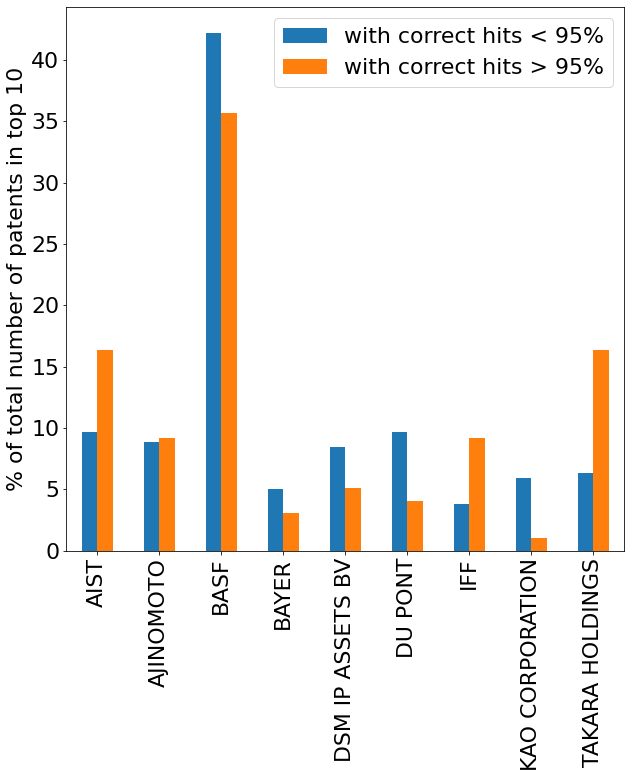

In [149]:
good_and_rest_p = good_and_rest[['company','num_of_patents', 'type']]
jurisdiction_charts_nm = pd.pivot_table(good_and_rest_p, columns=['company'], index=['type'], aggfunc=np.sum).fillna(0).T
jurisdiction_charts_nm = jurisdiction_charts_nm.rename_axis(None,axis=1).reset_index()[['company', 'with correct hits < 95%', 'with correct hits > 95%']]
jurisdiction_charts_nm = jurisdiction_charts_nm.set_index('company')
jurisdiction_charts_nm = jurisdiction_charts_nm*100
figS4c = jurisdiction_charts_nm
jurisdiction_charts_nm.plot.bar(rot=90, title='', ylabel = '% of total number of patents in top 10', xlabel = '', figsize=(10, 10))

## Figure S3C

<AxesSubplot:ylabel='% of total number of sequences in top 10'>

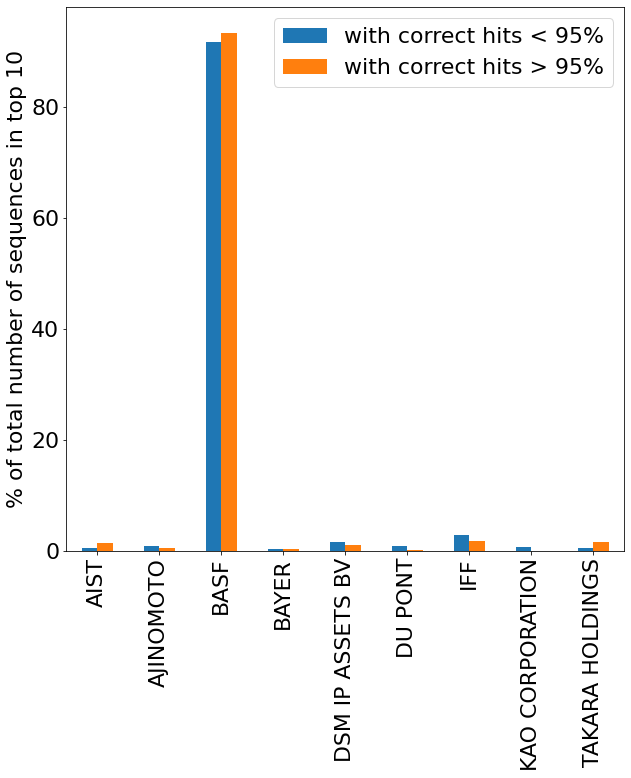

In [150]:
good_and_rest_s = good_and_rest[['company','num_of_sequences', 'type']]
jurisdiction_charts_nm = pd.pivot_table(good_and_rest_s, columns=['company'], index=['type'], aggfunc=np.sum).fillna(0).T
jurisdiction_charts_nm = jurisdiction_charts_nm.rename_axis(None,axis=1).reset_index()[['company', 'with correct hits < 95%', 'with correct hits > 95%']]
jurisdiction_charts_nm = jurisdiction_charts_nm.set_index('company')
jurisdiction_charts_nm = jurisdiction_charts_nm*100
figS4b = jurisdiction_charts_nm
jurisdiction_charts_nm.plot.bar(rot=90, title='', ylabel = '% of total number of sequences in top 10', xlabel = '', figsize=(10, 10))

In [157]:
marine_params = parameter_estimation_for_tracing_origins(marine_df_with_hits)
marine_params = marine_params.round(decimals = 4)

In [158]:
marine_params

dataset_size  perc_identified  q_values  p_values
0         0.9997           0.3051      80.0       0.0
1         0.9944           0.3067      80.0      25.0
2         0.6999           0.4312      80.0      50.0
3         0.5555           0.5384      80.0      60.0
4         0.4388           0.6708      80.0      70.0
5         0.3432           0.8321      80.0      80.0
6         0.2914           0.9324      80.0      90.0
7         0.2755           0.9548      80.0      95.0
8         0.2645           0.9580      80.0      99.0
9         0.9433           0.3206      85.0       0.0
10        0.9394           0.3219      85.0      25.0
11        0.6854           0.4368      85.0      50.0
12        0.5483           0.5413      85.0      60.0
13        0.4344           0.6724      85.0      70.0
14        0.3398           0.8336      85.0      80.0
15        0.2889           0.9332      85.0      90.0
16        0.2735           0.9544      85.0      95.0
17        0.2626           0.9577      85.0      99.0
18        0.8714           0.3408      90.0       0.0
19        0.8683           0.3420      90.0      25.0
20        0.6576           0.4470      90.0      50.0
21        0.5325           0.5481      90.0      60.0
22        0.4245           0.6768      90.0      70.0
23        0.3334           0.8356      90.0      80.0
24        0.2837           0.9348      90.0      90.0
25        0.2689           0.9552      90.0      95.0
26        0.2587           0.9575      90.0      99.0
27        0.7355           0.3877      95.0       0.0
28        0.7343           0.3883      95.0      25.0
29        0.5944           0.4757      95.0      50.0
30        0.4997           0.5634      95.0      60.0
31        0.4035           0.6868      95.0      70.0
32        0.3213           0.8386      95.0      80.0
33        0.2746           0.9351      95.0      90.0
34        0.2609           0.9543      95.0      95.0
35        0.2515           0.9568      95.0      99.0
36        0.4770           0.5376      99.0       0.0
37        0.4768           0.5379      99.0      25.0
38        0.4303           0.5948      99.0      50.0
39        0.3922           0.6519      99.0      60.0
40        0.3394           0.7442      99.0      70.0
41        0.2877           0.8593      99.0      80.0
42        0.2532           0.9376      99.0      90.0
43        0.2417           0.9529      99.0      95.0
44        0.2330           0.9551      99.0      99.0

In [160]:
marine_params['perc_identified'] = pd.to_numeric(pd.cut(marine_params['perc_identified'], bins=[0,0.20,0.40,0.60,0.70,0.80,0.90, 0.95], labels=[20,40,60,70,80,90,95]))
figS4a = marine_params

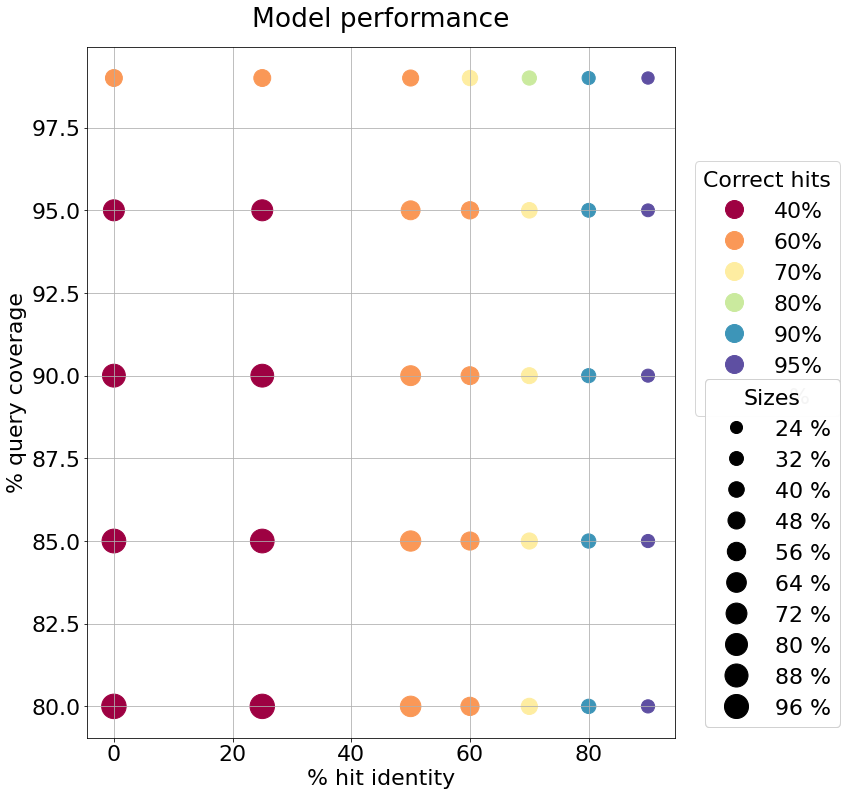

In [162]:
fig, ax = plt.subplots(figsize=(12, 12), facecolor='white')
scatter = ax.scatter(x = marine_params['p_values'], y = marine_params['q_values'],
           s = 0.3*(marine_params['dataset_size']*100*20),
                     c = 0.3*(marine_params['perc_identified']*50)**2,
                    cmap="Spectral")
#cb = plt.colorbar(scatter)
#cb.set_label('desired_label')
#scatter.set_clim(vmin=0, vmax=15)

#plt.clim(min(marine_params['perc_identified']), max(marine_params['perc_identified'])) 

#plt.pcolor(X, Y, f(data), cmap=cm, vmin=-4, vmax=4)

kw1 = dict(prop="colors", fmt="{x:.0f}%",
          func=lambda s: np.sqrt(s/.3)/50)

legend1 = ax.legend(*scatter.legend_elements(**kw1),
                    loc="center right", title="Correct hits",  bbox_to_anchor=(1.3, 0.65), markerscale=3)

ax.add_artist(legend1)

kw2 = dict(prop="sizes", fmt="{x:.0f} %",
          func=lambda s: s/(.3*20))

legend2 = ax.legend(*scatter.legend_elements(**kw2),
                    loc="lower right", title="Sizes", bbox_to_anchor=(1.3, 0))

ax.add_artist(legend2)
ax.set_position([0.1,0.1,0.68,0.8])
ax.grid(True)
plt.xlabel("% hit identity")
plt.ylabel("% query coverage")
plt.title("Model performance", pad=20)
plt.savefig(str(plt_dir)+'marine_sequences_species_tag.png', facecolor=fig.get_facecolor(), transparent=False, pad_inches = 0.01, bbox_extra_artists =[legend1, legend2])
plt.show()

In [151]:
figS4 = [figS4a, figS4b, figS4c]

In [152]:
with open('../results/tables2plot/plofigS4.pkl', 'wb') as f:
    pickle.dump(figS4, f)